# Projet numérique - Choix du pas de temps

GUITET Quentin & PLESSIER Aymeric

## Partie 1 : Pas fixe

---
#### Consigne : 
Coder une fonction \
\
def solve_euler_explicite(f, x0, dt, t0 = 0, tf) : \
... \
return t, x \
\
prenant en entrée une fonction $f$, une condition initiale $x_0$ et un pas de temps $dt$, et renvoyant le vecteur des dates $t^j$ et de la solution $x^j$ du schéma d'Euler explicite appliqué à $\dot x = f(t, x)$ 

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

def solve_euler_explicit(f,x0,dt,t0=0,tf=1) :
    """Utilise la methode d'Euler explicite pour resoudre une equation differentielle d'ordre 1.
    Entree :
     f : fonction de la forme (t,x) -> x'(t) ou t est un reel et x un tableau
     x0 : condition initiale en t0 (vecteur numpy ou float)
     t0=0 : temps initial
     tf=1 : temps final
    Sortie :
     t : tableau des temps
     x : tableau des valeurs"""
    n_ = (tf-t0)/dt
    n = int(n_)
    if 0.99>n_-n>0.1 : # si on a un decalage superieur a 10% du pas, le signale (ne calcule pas jusqu'a la fin de l'intervalle)
        print("Attention, le calcul s'arrêtera légèrement avant tf (pas de temps ne tombant pas juste)")

    # ce qui suit est une modification ad-hoc car on s'est rendu compte que meme quand theoriquement (tf-t0)/dt est entier,
    # une erreur d'arrondi peut donner un n une unite en dessous a cause d'un arrondi qui donne n.999999...
    if n_-n>=0.99 :
        print("attention, erreur d'arrondi (normalement sans incidence)")
        n+=1

    if type(x0) == np.ndarray : X = np.empty((n+1,*x0.shape),dtype = np.float64)
    else : X = np.empty(n+1,dtype = np.float64)
    T = np.empty(n+1,dtype = np.float64 )

    X[0] = x0
    T[0] = t0
    for i in range(n) :
        T[i+1] = dt + T[i]
        X[i+1] = X[i] + dt*f(T[i],X[i])
    
    return T,X

---

#### Consigne : 
Illustrer la convergence du schéma à l'ordre 1

---

attention, erreur d'arrondi (normalement sans incidence)


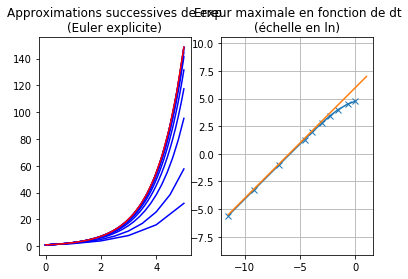

In [2]:
# l'avantage de la fonction exponentielle et de la methode d'euler explicite, c'est que le maximum de l'erreur est tf
# (on sous-estime en permanence la fonction), cela permet donc de calculer plus simplement l'erreur maximale

def f(t,x) :
    return x

fig, (a1,a2) = plt.subplots(1,2)

DT = [1,0.5,0.2,0.1,0.05,0.02,0.01,0.001,0.0001,0.00001]
E = []

exp_5 = np.exp(5)

for dt in DT :
    T,X = solve_euler_explicit(f,1,dt,0,5)
    a1.plot(T,X,color="blue")
    E.append(exp_5-X[-1])

X = np.linspace(0,5,20)
a1.plot(X,np.exp(X),color="red")
a1.set_title("Approximations successives de exp\n(Euler explicite)")

a2.plot(np.log(DT),np.log(E),'-x')
X = np.array((-11.5,1))
a2.plot(X,X+6)
a2.axis("equal")
a2.grid()
a2.set_title("Erreur maximale en fonction de dt\n(échelle en ln)")

plt.show()

# le resultat obtenu nous montre qu'on a bien un schema d'ordre 1 (la pente en echelle log) avec une constante C
# (ordonnee a l'origine de la regression lineaire) telle que ln(C) ~ 6 => C ~ 400


---

#### Consigne :
Faire de même avec un schéma d'ordre 2 et comparer la convergence

---

In [3]:
def solve_heun(f,x0,dt,t0=0,tf=1) :
    """Utilise la methode d'Euler explicite pour resoudre une equation differentielle d'ordre 1.
    Entree :
     f : fonction de la forme (t,x) -> x'(t) ou t est un reel et x un tableau
     x0 : condition initiale en t0 (vecteur numpy ou float)
     t0=0 : temps initial
     tf=1 : temps final
    Sortie :
     t : tableau des temps
     x : tableau des valeurs"""
    n_ = (tf-t0)/dt
    n = int(n_)
    if 0.99>n_-n>0.1 : # si on a un decalage superieur a 10% du pas, le signale (ne calcule pas jusqu'a la fin de l'intervalle)
        print("Attention, le calcul s'arrêtera légèrement avant tf (pas de temps ne tombant pas juste)")

    # ce qui suit est une modification ad-hoc car on s'est rendu compte que, meme quand theoriquement (tf-t0)/dt est entier,
    # une erreur d'arrondi peut donner un n une unite en dessous a cause d'un arrondi qui donne n.999999...
    if n_-n>=0.99 :
        print("attention, erreur d'arrondi (normalement sans incidence)")
        n+=1

    if type(x0) == np.ndarray : X = np.empty((n+1,*x0.shape),dtype = np.float64)
    else : X = np.empty(n+1,dtype = np.float64)
    T = np.empty(n+1,dtype = np.float64 )

    X[0] = x0
    T[0] = t0

    dt_2 = dt/2

    for i in range(n) :
        T[i+1] = dt + T[i]
        a = f(T[i],X[i])
        X[i+1] = X[i] + dt_2*( a + f(T[i+1],X[i]+dt*a) )
    
    return T,X


attention, erreur d'arrondi (normalement sans incidence)


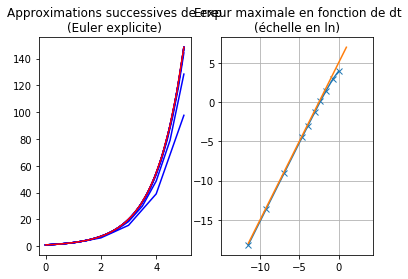

In [4]:
fig, (a1,a2) = plt.subplots(1,2)

DT = [1,0.5,0.2,0.1,0.05,0.02,0.01,0.001,0.0001,0.00001]
E = []

exp_5 = np.exp(5)

for dt in DT :
    T,X = solve_heun(f,1,dt,0,5)
    a1.plot(T,X,color="blue")
    E.append(exp_5-X[-1])

X = np.linspace(0,5,20)
a1.plot(X,np.exp(X),color="red")
a1.set_title("Approximations successives de exp\n(Euler explicite)")

a2.plot(np.log(DT),np.log(E),'-x')
X = np.array((-11.5,1))
a2.plot(X,2*X+5)
a2.axis("equal")
a2.grid()
a2.set_title("Erreur maximale en fonction de dt\n(échelle en ln)")

plt.show()

# le resultat obtenu nous montre qu'on a bien un schema d'ordre 2 (la pente en echelle log) avec une constante C
# (ordonnee a l'origine de la regression lineaire) telle que ln(C) ~ 5 => C ~ 150

## Partie 2 : Adaptation du pas de temps

On pose \
$e^{j+1} = (x^j + \int _{t_j} ^{t_{j+1}} f(s, x(s)) ds) - x^{j+1}$

---

#### Consigne :
Montrer que si $f$ est $C^1$, pour le schéma d'Euler explicite, on a \
$ \|{e^{j+1}}\| = \Delta t_j \frac {\|f(t_{j+1},x^{j+1})-f(t_j, x^j)\|} {2} + O(\Delta t_j^3) $

---

On cherche à évalauer l'erreur commise sachant que l'on part de la bonne valeur à l'itération $j$, c'est-à-dire $x(t_j)=x^j$, on peut donc réécrire $e^{j+1}$

$e^{j+1} = \big(x^j + \int _{t_j} ^{t_{j+1}} f(s, x(s)) ds \big) - x^{j+1}$ \
$e^{j+1} = x(t_{j+1}) - x^{j+1}$\
$e^{j+1} = x(t_j+\Delta t_j) - x^{j+1}$\
\
Par hypothése, $f$ est $C^1$, donc $x$ est $C^2$, on peut donc développer à l'ordre deux le terme $x(t_j+\Delta t_j)$\
\
$e^{j+1} = x(t_j)+\Delta t_j \cdot \dot x(t_j) + \frac {{\Delta t_j}^2}{2} \cdot \ddot x(t_j) + o({\Delta t_j}^2) - x^{j+1}$\
\
Or, dans le schéma d'Euler explicite, on a $x^{j+1} = x^j + \Delta t_j \cdot f(t_j, x(t_j)) = x(t_j)+\Delta t_j \cdot \dot x(t_j)$\
On a donc \
\
$e^{j+1} = \frac {{\Delta t_j}^2}{2} f'(t_j, x(t_j)) + o({\Delta t_j}^2)$\
\
Comme $f$ est $C^1$, on peut écrire, avec la règle de la chaîne \
\
$f'(t_j, x^j) = \frac{\partial f} {\partial u} (t_j, x(t_j)) + f(t_j, x(t_j)) \cdot \frac{\partial f} {\partial v} (t_j, x(t_j))$ \
\
D'où cette expression de l'erreur \
\
$e^{j+1} = \frac {{\Delta t_j}^2}{2} \big(\frac{\partial f} {\partial u} (t_j, x(t_j)) + f(t_j, x(t_j)) \cdot \frac{\partial f} {\partial v} (t_j, x(t_j))\big) + o(\Delta t_j^2)$\
\
D'autre part, $f$ étant $C^1$, on peut écrire un développement à l'ordre 1 selon les deux variables \
\
$f(t_{j+1}, x^{j+1}) = f(t_j, x(t_j)) + \Delta t_j \cdot \frac{\partial f} {\partial u} (t_j, x(t_j)) + (x^{j+1} - x(t_j)) \cdot \frac{\partial f} {\partial v} (t_j, x(t_j)) + o(\Delta t_j \|x^{j+1} - x(t_j)\|)$\
\
Or, on sait que le schéma d'Euler explicite est convergent à l'ordre 1 donc on peut écrire \
\
$max_j \|x^{j+1} - x(t_j) \| \leqslant c_v \cdot \Delta t_j$ \
\
Donc \
\
$\|x^{j+1} - x(t_j)\| = O(\Delta t_j)$ \
\
Et de plus, le schéma d'Euler explicite donne que \
\
$x^{j+1} - x(t_j) = f(t_j, x(t_j)) \cdot \Delta t_j$ \
\
On obtient donc à partir de la dernière expression de $e^{j+1}$ \
\
$e^{j+1} = \frac {{\Delta t_j}^2}{2} \big( \frac {f(t_{j+1},x^{j+1})-f(t_j, x^j)} {\Delta t_j} + O(\Delta t_j) \big) + O(\Delta t_j^3)$ \
\
D'où le résultat en passant à la norme \
\
$\| e^{j+1} \| = \frac {\Delta t_j}{2} \cdot \|f(t_{j+1},x^{j+1})-f(t_j, x^j) \| + O(\Delta t_j^3)$

---

#### Consigne :
En justifiant par ailleurs $e^{j+1} = O(\Delta t_j^2)$, en déduire qu'une possible stratégie d'adaptation est de choisir \
$\Delta t_{new} = \Delta t_j \cdot \sqrt {\frac{Tol_{abs}} {\| e^{j+1} \|}}$

---

On avait $x^j = x(t_j)$ d'où $e^{j+1} = \Delta t_j \cdot \eta^{j+1}$ \
\
De plus, on sait que le schéma d'Euler explicite est consistant, ce qui donne $\| \eta_{j+1} \| \leqslant c_s \cdot \Delta t_j $\
\
Donc $\| e^{j+1} \| \leqslant c_s \cdot \Delta t_j^2 $ \
\
Ergo $ e^{j+1} = O(\Delta t_j^2)$

L'équation précédemment établie est une sorte de "loi d'échelle" qui nous permet d'évaluer l'évolution de l'erreur locale lorque le pas de temps évolue lui aussi. Cette relation fait apparaître un carré, cela signifie que multiplier par 10 le pas de temps pour corriger aura pour conséquence de multiplier environ par 100 l'erreur commise. Ainsi, si on souhaite limiter l'erreur à $Tol_{abs}$ à l'itération utilisant le pas de temps $\Delta t_{new}$, on peut chercher à respecter le rapport suivant \
$ \big( \frac{\Delta t_{new}} {\Delta t_j} \big)^2 \simeq \frac {Tol_{abs}} {\|e^{j+1} \|}$ \
On peut donc adopter la stratégie suivante pour calculer un nouveau pas de temps $\Delta t_{new} = \Delta t_j \cdot \sqrt {\frac{Tol_{abs}} {\| e^{j+1} \|}}$

---

#### Consigne :
Illustrer et expliquer le fonctionnement du solveur suivant

---

In [12]:
def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x)
            x_back = x_next - dt * f(x_next)
            ratio_abs_error = atol / (np.linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * np.sqrt(ratio_abs_error)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x)
        ts = np.vstack([ts,t_next])
        xs = np.vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs.T)

$\rightarrow$ L'objectif de ce solveur est d'implémenter le schéma numérique d'Euler explicte pour résoudre une équation différentielle et retourner le graphe (abscisses et ordonnées) de la solution échantillonnée selon un pas de temps fixé et constant $dt_{max}$. Cependant, la détermination des points du graphe se fait en variant le pas de temps (selon la stratégie précédente) entre deux pas de temps $dt_{max}$ de manière à obtenir le point le plus précis possible

$\rightarrow$ On initialise de la même manière que pour la méthode proposée en partie 1 avec les conditions initiales données en argument, et on démarre avec un petit pas de temps $dt$ qui va évoluer de manière à minimiser les erreurs

$\rightarrow$ Tant que la dernière date enregistrée $t$ ne dépasse pas la date finale souhaitée du calcul $t_f$, on fixe une horloge interne $t_i$ à $0$ et on démarre le schéma d'Euler explicte avec un pas de temps $dt$ afin d'obtenir un point $x_{next}$, et on incrémente la date courante $t$ et l'horloge interne $t_i$ de $dt$

$\rightarrow$ On calcule ensuite le point précédant $x_{next}$, nommé $x_{back}$, à partir de $x_{next}$ selon Euler explicite. On estime donc l'erreur relative commise par rapport à l'erreur tolérée $A_{tol}$ et on adapte le petit pas de temps $dt$ à partir de cette erreur selon la formule établie à la question précédente et avec une marge de sécurité de $0,9$

$\rightarrow$ Si le petit pas de temps $dt$ proposé par la correction est trop faible, soit inférieur à la limite de sécurité $dt_{min}$, alors on lève une exception, au contraire s'il dépasse la moitié du pas de temps total de cette itération $dt_{max}$ alors on le fixe à $\frac {dt_{max}}{2}$

$\rightarrow$ Tant que l'horloge interne $t_i$ ne dépasse pas le pas de temps maximal $dt_{max}$, on passe à la date suivante pour $t$ et $t_i$ et au point suivant pour $x_{next}$, et on on réitère en se rapprochant de $dt_{max}$ avec $t_i$

$\rightarrow$ Une fois suffisamment proche de $dt_{max}$, on sort de la boucle et on passe à la date suivante en ajoutant directement le temps restant pour atteindre $dt_{max}$, on remet l'horloge $t_i$ à zéro, et on passe au point suivant avec pour pas de temps le temps restant pour atteindre $dt_{max}$

$\rightarrow$ On garde en mémoire la nouvelle date atteinte, c'est-à-dire la date précédente plus $dt_{max}$, le point atteint à cette date, et on recommence jusqu'à la date finale $t_f$

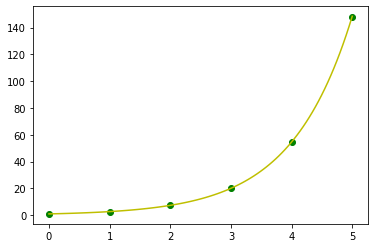

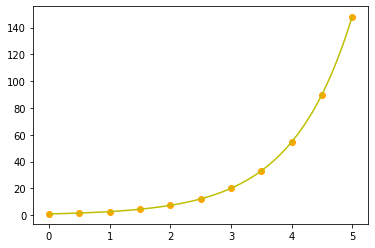

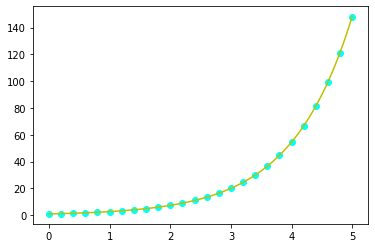

In [34]:
# On reprend la fonction exponentielle

def f(x) :
    return x

# On choisit trois representations avec des pas de temps grossiers (1, 0.5 et 0.2) qui donnaient des resultats
# assez eloignes de la branche exponentielle dans la premiere partie

t1, x1 = solve_ivp_euler_explicit_variable_step(f, 0, 1, 4, 1e-16,  1, 1e-6)
t2, x2 = solve_ivp_euler_explicit_variable_step(f, 0, 1, 5, 1e-16,  0.5, 1e-6)
t3, x3 = solve_ivp_euler_explicit_variable_step(f, 0, 1, 5, 1e-16,  0.2, 1e-6)

T = np.linspace(0,5,100)

plt.scatter(t1,x1.T, color = 'g')
plt.plot(T,np.exp(T), color = 'y')
plt.show()

plt.scatter(t2,x2.T, color = 'orange')
plt.plot(T,np.exp(T), color = 'y')
plt.show()

plt.scatter(t3,x3.T, color = 'cyan')
plt.plot(T,np.exp(T), color = 'y')
plt.show()

On remarque que le choix du pas de temps maximal $dt_{max}$ n'a pas de conséquences visibles sur la précision du résultat, mais seulement sur la réprésentation graphique. En effet la méthode d'amélioration du pas de temps est faite dans chaque intervalle de longueur $dt_{max}$ et va donc minimiser l'erreur et choissant de nouveaux pas de temps indépendamment de la taille de l'intervalle